# Electric Vehicle Population Analysis

This notebook analyzes the Electric Vehicle Population dataset to understand the trends and characteristics of electric vehicles. We will perform data cleaning, exploratory data analysis, and build a machine learning model to predict the electric vehicle type.

In [1]:
import numpy  as np
import pandas  as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Cleaning

First, we load the dataset and perform some basic cleaning steps, like handling missing values.

In [2]:
e_car = pd.read_csv("Electric_Vehicle_Population_Data.csv")
e_car.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [3]:
e_car.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
250658,JTMAB3FV8P,Klickitat,Goldendale,WA,98620.0,2023,TOYOTA,RAV4 PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,14.0,255440223,POINT (-120.82545 45.823),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...,5.303995e+10


### Handling Missing Values

In [4]:
e_car.isnull().sum()

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64

In [5]:
refined_data = e_car.dropna()

In [6]:
refined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250047 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250047 non-null  object 
 1   County                                             250047 non-null  object 
 2   City                                               250047 non-null  object 
 3   State                                              250047 non-null  object 
 4   Postal Code                                        250047 non-null  float64
 5   Model Year                                         250047 non-null  int64  
 6   Make                                               250047 non-null  object 
 7   Model                                              250047 non-null  object 
 8   Electric Vehicle Type                              250047 non-null  object 
 9 

## 2. Exploratory Data Analysis (EDA)

In this section, we explore the data to find interesting patterns and insights. We will look at the distribution of vehicle makes, models, and types.

In [7]:
refined_data['Make'].value_counts()

Make
TESLA                     104974
CHEVROLET                  18197
NISSAN                     16071
FORD                       13445
KIA                        12156
BMW                        10527
TOYOTA                     10392
HYUNDAI                     8309
RIVIAN                      7623
VOLVO                       6552
VOLKSWAGEN                  6468
JEEP                        6343
AUDI                        4584
CHRYSLER                    3562
MERCEDES-BENZ               2811
HONDA                       2436
SUBARU                      2187
PORSCHE                     1696
CADILLAC                    1468
POLESTAR                    1427
MAZDA                       1234
MINI                        1192
LEXUS                       1135
MITSUBISHI                  1124
FIAT                         851
LUCID                        463
GMC                          439
GENESIS                      415
LINCOLN                      407
ACURA                        321
DODGE

In [8]:
r = (refined_data["Electric Range"] <=200).sum()
print("The Range of cars above 200 are ",r)

The Range of cars above 200 are  218095


In [9]:
r = (refined_data["Electric Range"] >=200).sum()
print("The Range of cars below 200 are ",r)

The Range of cars below 200 are  33208


In [10]:
refined_data.loc[(refined_data['Make'] == 'TESLA') & (refined_data['Model Year'] == 2020), ['Make', 'Model Year']]

,Make,Model Year
2,TESLA,2020
5,TESLA,2020
6,TESLA,2020
16,TESLA,2020
24,TESLA,2020
...,...,...
250500,TESLA,2020
250508,TESLA,2020
250514,TESLA,2020
250569,TESLA,2020


In [11]:
refined_data['County'].value_counts()

County
King            124200
Snohomish        31028
Pierce           20828
Clark            15270
Thurston          9175
Kitsap            8478
Spokane           7122
Whatcom           6144
Benton            3391
Skagit            2940
Island            2750
Yakima            1693
Chelan            1552
Clallam           1527
Jefferson         1318
Cowlitz           1303
Mason             1234
San Juan          1207
Lewis             1120
Franklin          1008
Grays Harbor       943
Grant              936
Kittitas           929
Walla Walla        686
Douglas            555
Whitman            513
Klickitat          448
Okanogan           384
Stevens            311
Pacific            291
Skamania           250
Asotin              96
Adams               96
Wahkiakum           87
Pend Oreille        87
Lincoln             77
Ferry               44
Columbia            23
Garfield             3
Name: count, dtype: int64

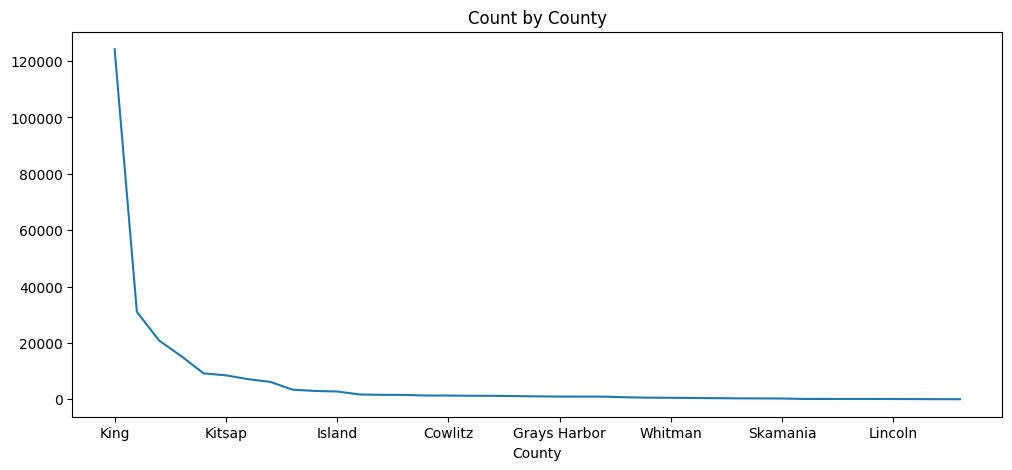

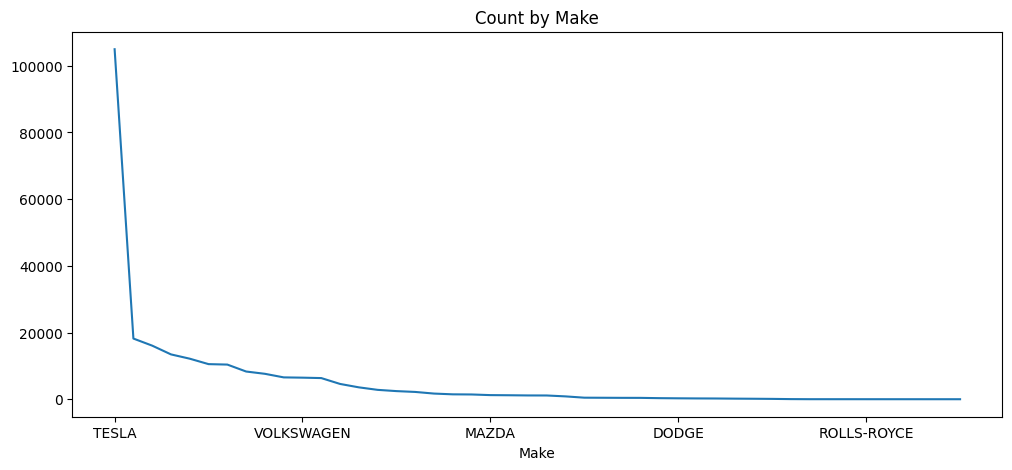

In [12]:
# Plot value counts for County
refined_data['County'].value_counts().plot(kind='line',figsize=(12, 5))
plt.title('Count by County')
plt.show()

# Plot value counts for Make
refined_data['Make'].value_counts().plot(kind='line', figsize=(12, 5))
plt.title('Count by Make')
plt.show()

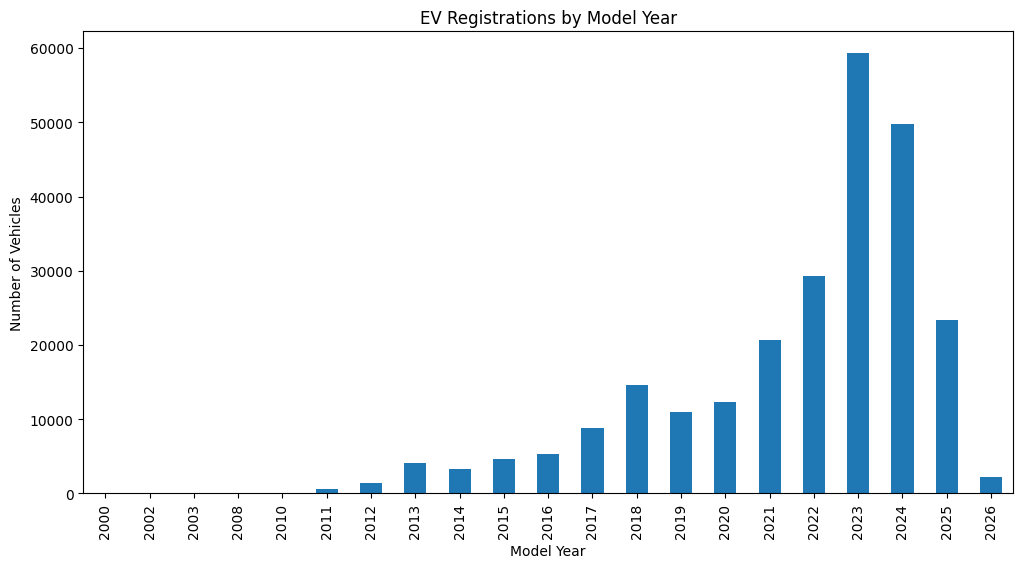

In [13]:
# EV registrations by year
plt.figure(figsize=(12,6))
e_car['Model Year'].value_counts().sort_index().plot(kind='bar')
plt.title('EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.show()

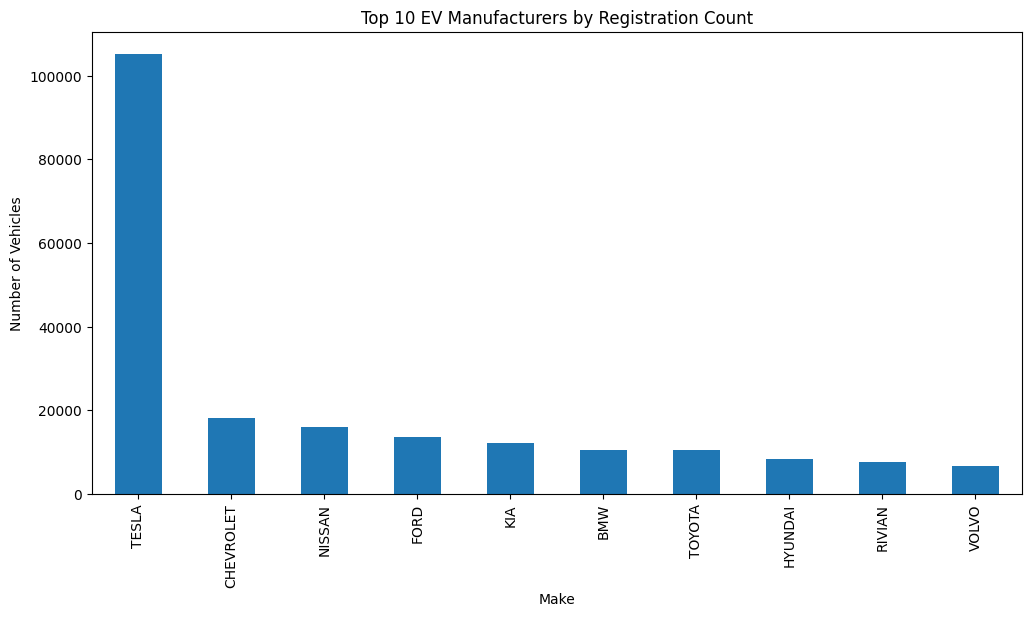

In [14]:
# Top manufacturers by count
top_makes = e_car['Make'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
top_makes.plot(kind='bar')
plt.title('Top 10 EV Manufacturers by Registration Count')
plt.ylabel('Number of Vehicles')
plt.show()

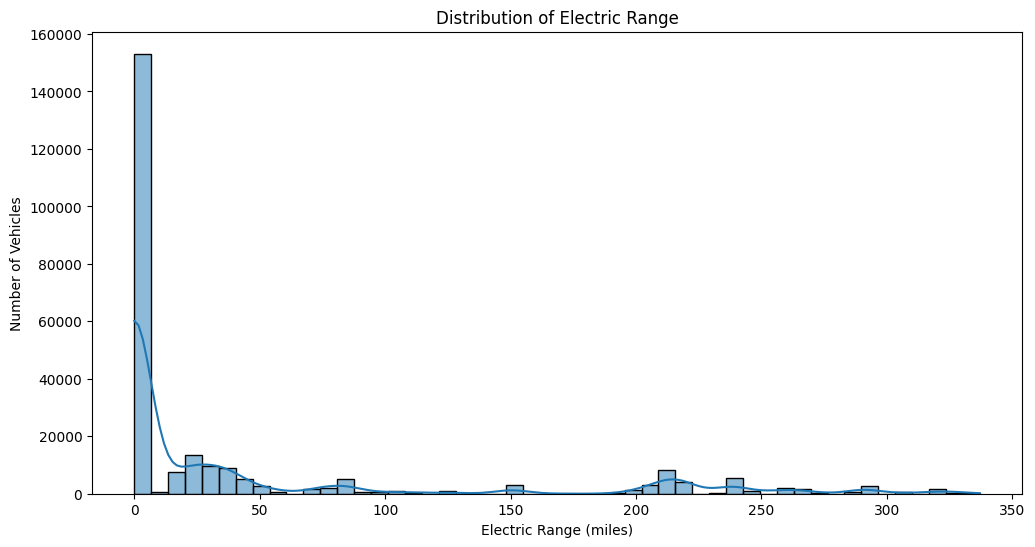

In [15]:
# Electric range distribution
plt.figure(figsize=(12,6))
sns.histplot(e_car['Electric Range'], bins=50, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.show()

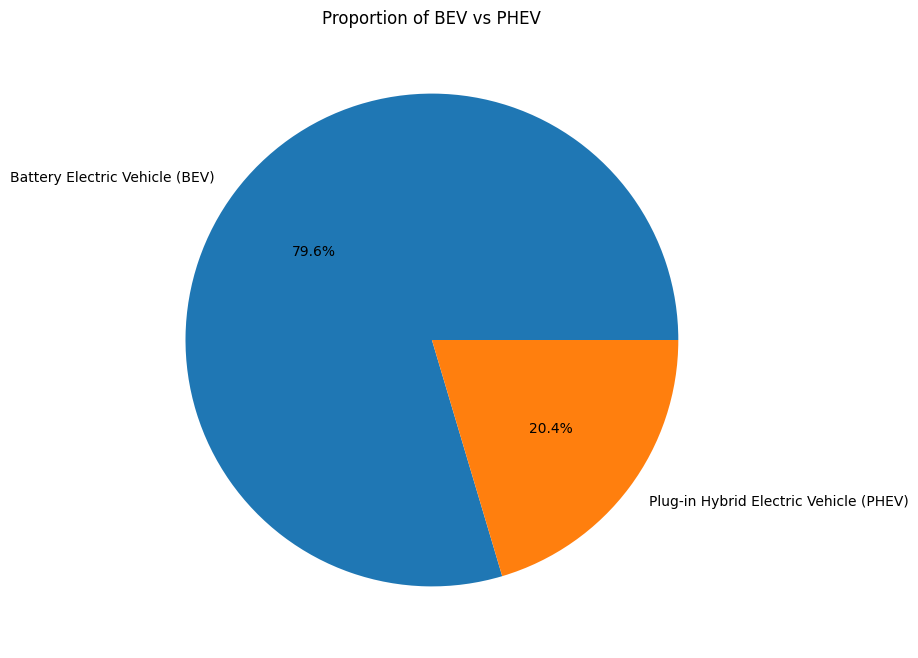

In [16]:
# Compare BEV vs PHEV
ev_type_counts = e_car['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of BEV vs PHEV')
plt.show()

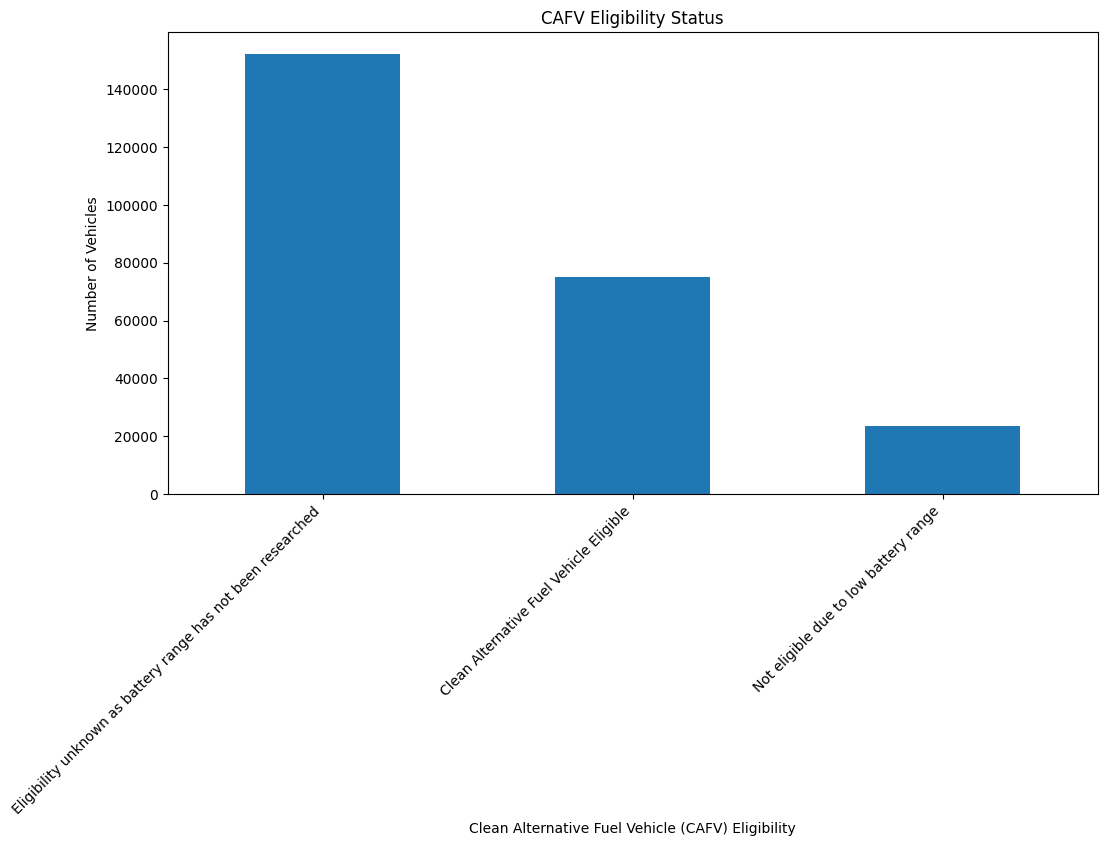

In [17]:
# Clean Alternative Fuel Vehicle Eligibility
cafv_counts = e_car['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(12,6))
cafv_counts.plot(kind='bar')
plt.title('CAFV Eligibility Status')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

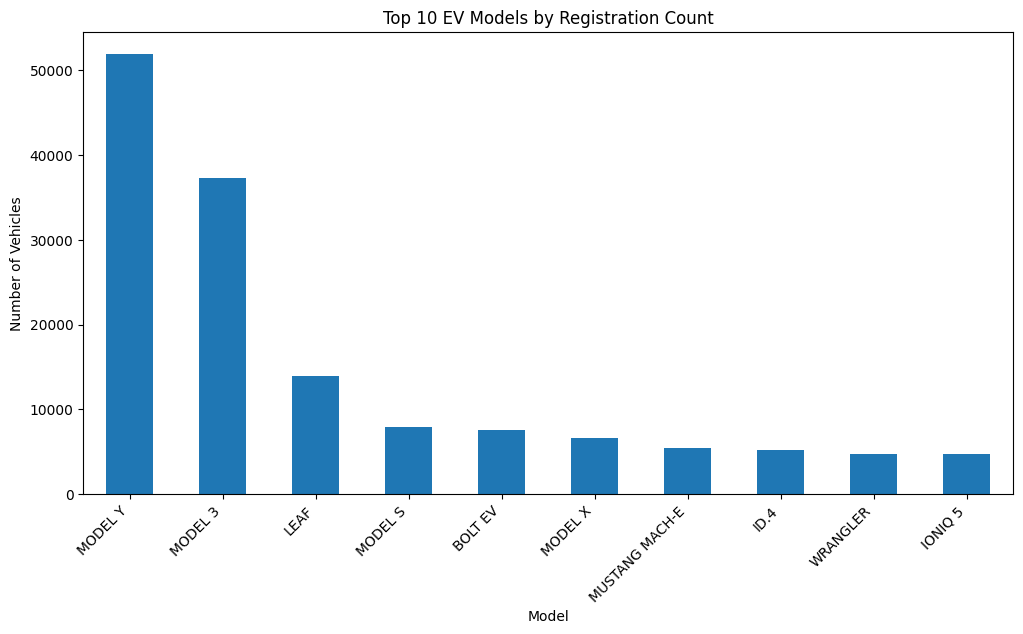

In [18]:
# Top 10 models by count
top_models = e_car['Model'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
top_models.plot(kind='bar')
plt.title('Top 10 EV Models by Registration Count')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3. Machine Learning Model

Now, we will build a machine learning model to predict the `Electric Vehicle Type` (BEV or PHEV). We will use a Logistic Regression model for this classification task.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
features = ['Model Year', 'Make', 'Model']
target = 'Electric Vehicle Type'

X = refined_data[features]
y = refined_data[target]

# Encode categorical features
X = pd.get_dummies(X, columns=['Make', 'Model'], drop_first=True)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('
Classification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

SyntaxError: unterminated string literal (detected at line 5) (2013971723.py, line 5)